# Plot histograms

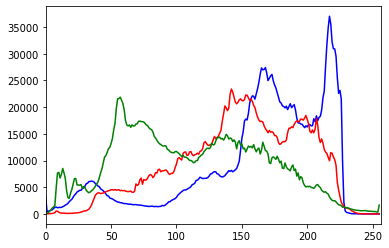

In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

img = cv.imread("img1.jpg")
img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
img_equ = cv.equalizeHist(img_gray)
hist_blue = cv.calcHist([img],[0],None,[256],[0,256]) #[0] for blue channel
hist_red = cv.calcHist([img],[1],None,[256],[0,256]) #[1] for green channel
hist_green = cv.calcHist([img],[2],None,[256],[0,256]) #[2] for red channel
hist_gray = cv.calcHist([img_gray],[0],None,[256],[0,256]) #[0] for grey image
hist_equ = cv.calcHist([img_equ],[0],None,[256],[0,256]) #[0] for grey image
plt.plot(hist_blue, color = "b")
plt.plot(hist_red, color = "r")
plt.plot(hist_green, color = "g")
plt.xlim([0,256])
plt.show()

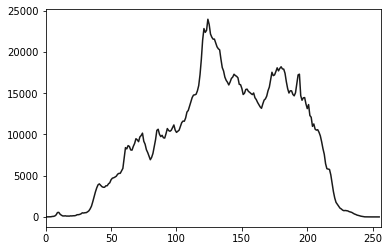

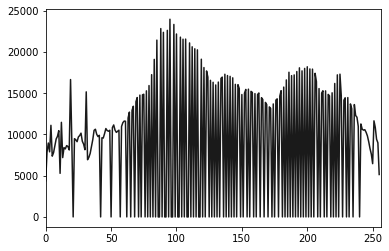

In [29]:
plt.plot(hist_gray, color = "0.1")
plt.xlim([0,256])
plt.show()
plt.plot(hist_equ, color = "0.1")
plt.xlim([0,256])
plt.show()

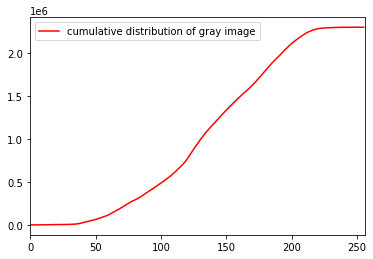

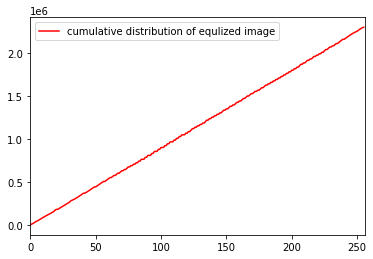

In [30]:
def getCumulativeDist(hist):
    c = [] #comulative distribution
    s = 0
    for i in range(0, len(hist)):
        s = s + hist[i]
        c.append(s)
    return c

c = getCumulativeDist(hist_gray)
plt.plot(c, label = "cumulative distribution of gray image", color = "r")
plt.legend(loc="upper left")
plt.xlim([0, 256])
plt.show()

# Histogram equalisation to improve quality of image

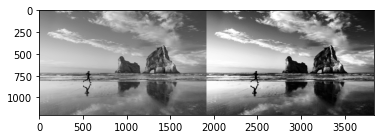

In [37]:
img_euqualisation = np.hstack((img_gray, img_equ))
c = getCumulativeDist(hist_equ)
plt.plot(c, label = "cumulative distribution of equlized image", color = "r")
plt.legend(loc="upper left")
plt.xlim([0, 256])
plt.show()

img_equalisation = np.hstack((img_gray, img_equ)) 
plt.imshow(img_equalisation, "gray")



# Comparing images via computing the Kullback-Leilber divergence between their histograms

In [32]:
import math

def compute_chi_squared(h1,h2):
    chi_squared = 0
    epsilon = 1e-10
    for i in range(0,len(h1)):
        chi_squared+=(h1[i]-h2[i])**2/(h1[i]+h2[i]+epsilon)
    return chi_squared

def compute_kl(h1,h2):
    h1 = normalize_array(h1)
    h2 = normalize_array(h2)

    kl = 0
    epsilon = 1e-10
    for i in range(0,len(h1)):
        kl+=h1[i]*math.log(epsilon+h1[i]/(h2[i]+epsilon))
    return kl

def normalize_array(a):
    sum = a.sum()
    norm_a = [norm_entry/sum for norm_entry in a]
    return norm_a

img2=cv.imread("img2.jpg")
img3=cv.imread("img3.jpg")
img_gray2 = cv.cvtColor(img2,cv.COLOR_BGR2GRAY)
img_gray3 = cv.cvtColor(img3,cv.COLOR_BGR2GRAY)
h1 = hist_gray
h2 = cv.calcHist([img_gray2],[0],None,[256],[0,256])  # (image, channel, mask, number_of_bins, interval)
h3 = cv.calcHist([img_gray3],[0],None,[256],[0,256]) 
print("Kullback Leibler divergence between histogram 1 and 2: ", compute_kl(h1,h2)+compute_kl(h2,h1))
print("Kullback Leibler divergence between histogram 1 and 3: ", compute_kl(h1,h3)+compute_kl(h3,h1))
print("Kullback Leibler divergence between histogram 2 and 3: ", compute_kl(h2,h3)+compute_kl(h3,h2))
print("Chi squared between histogram 1 and 2: ", compute_chi_squared(h1,h2))
print("Chi squared between histogram 1 and 3: ", compute_chi_squared(h1,h3))
print("Chi squared between histogram 2 and 3: ", compute_chi_squared(h2,h3))

Kullback Leibler divergence between histogram 1 and 2:  [1.8719542]
Kullback Leibler divergence between histogram 1 and 3:  [1.702252]
Kullback Leibler divergence between histogram 2 and 3:  [3.3421733]
Chi squared between histogram 1 and 2:  [1567300.]
Chi squared between histogram 1 and 3:  [1434813.1]
Chi squared between histogram 2 and 3:  [837586.75]


The most similar images regarding the sum of the Kullback Leibler divergence of the histograms are image 1 and 3. The most similar images regarding Chi squared of the histograms are image 2 and 3.